In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as geo

C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\AB_NYC_2019.csv\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df['reviews_per_month'].fillna(0,inplace = True)

In [8]:
ngroups = df['neighbourhood_group'].value_counts()
ngroups

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

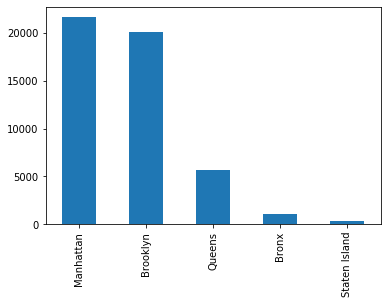

In [9]:
#plotting neighbourhood groups in a bar graph
#using pandas
ngroups.plot.bar()

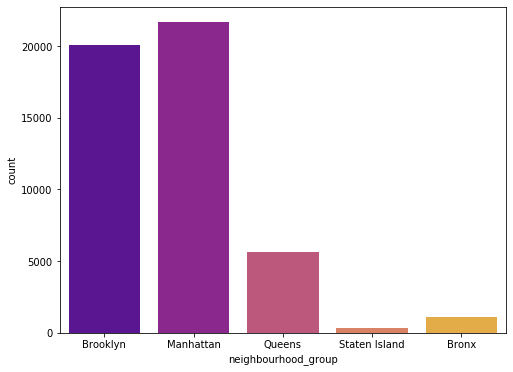

In [10]:
#plotting neighbourhood groups in a bar graph
#using seaborn
plt.figure(figsize=(8,6))
ax = sns.countplot(df['neighbourhood_group'], palette="plasma" ) 

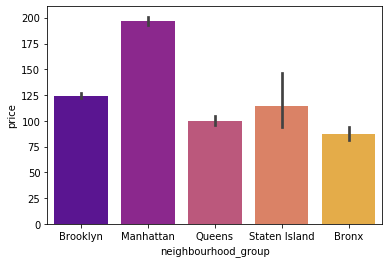

In [11]:
#Avg. price per neighbourhood group
ax = sns.barplot(df['neighbourhood_group'], df['price'], palette="plasma")

In [12]:
#check room types
room_type = df['room_type'].unique()
room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

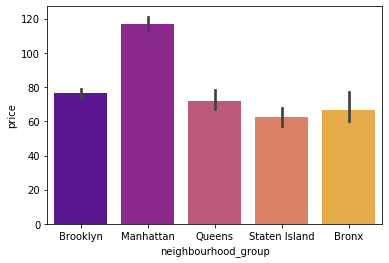

In [13]:
#Avg. Price of Private Rooms per neighbourhood group
PrivateRoomdf = df[df['room_type'] == 'Private room']
ax = sns.barplot(PrivateRoomdf['neighbourhood_group'], PrivateRoomdf['price'], palette="plasma")

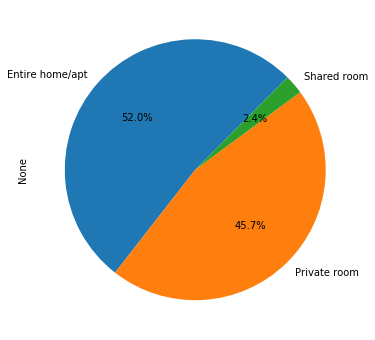

In [14]:
room_count = df.groupby('room_type').size()
fig1, ax1 = plt.subplots()
room_count.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=45, y='Room Types', figsize=(6,6))

In [15]:

subset = df[['neighbourhood_group','room_type']].groupby(['neighbourhood_group','room_type']).size()
subset


neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64

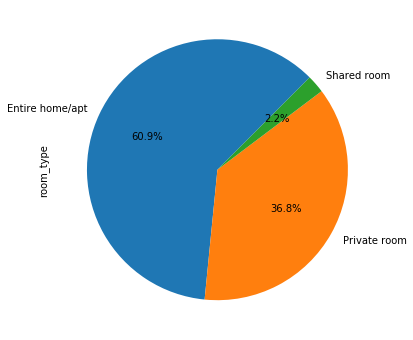

In [16]:
fig1, ax1 = plt.subplots()
Manhattan = df[df['neighbourhood_group'] =='Manhattan']
Manhattan['room_type'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=45, y='Room Types', figsize=(6,6))

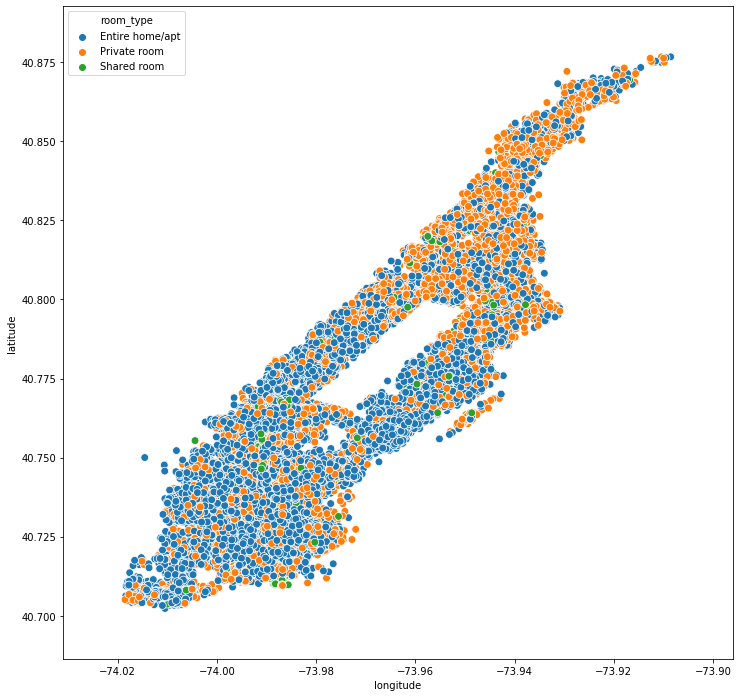

In [17]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='longitude', y='latitude', hue='room_type',s=60, data=Manhattan)

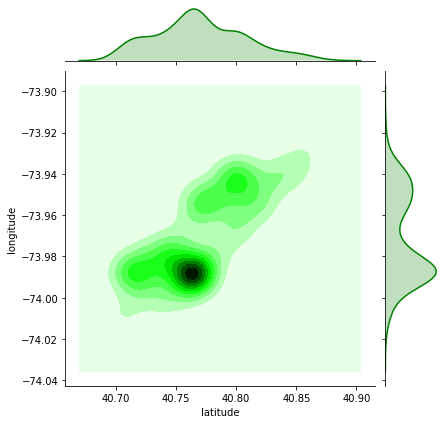

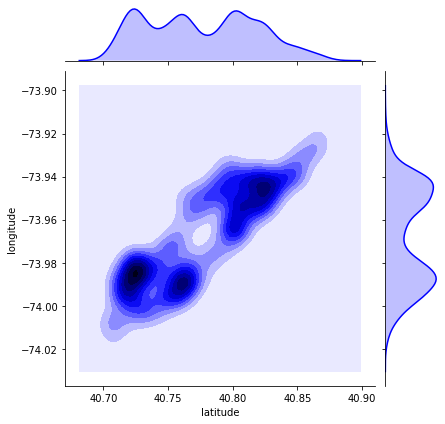

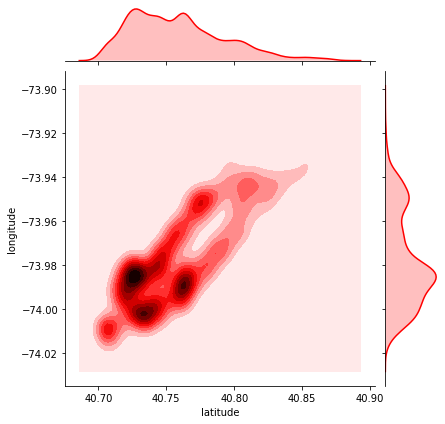

In [18]:
Manhattan_type = df[(df['neighbourhood_group'] == 'Manhattan') & (df['room_type'] == 'Shared room')]
Manhattan_type2 = df[(df['neighbourhood_group'] == 'Manhattan') & (df['room_type'] == 'Private room')]
Manhattan_type3 = df[(df['neighbourhood_group'] == 'Manhattan') & (df['room_type'] == 'Entire home/apt')]

ax = sns.jointplot("latitude", "longitude", data=Manhattan_type, kind="kde", color='g')
ax = sns.jointplot("latitude", "longitude", data=Manhattan_type2, kind="kde", color='b')
ax = sns.jointplot("latitude", "longitude", data=Manhattan_type3, kind="kde", color='r')

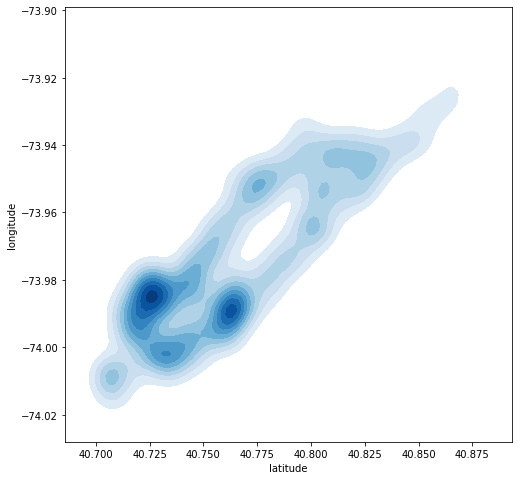

In [19]:
plt.figure(figsize=(8,8))
ax = sns.kdeplot(Manhattan.latitude, Manhattan.longitude,cmap="Blues", shade=True, shade_lowest=False)

In [21]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000
